<a href="https://colab.research.google.com/github/misbahsy/Learning/blob/master/Gaussian_Processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#test data
n= 50 
Xtest = np.linspace(-5, 5, n).reshape(-1,1)
Xtest

array([[-5.        ],
       [-4.79591837],
       [-4.59183673],
       [-4.3877551 ],
       [-4.18367347],
       [-3.97959184],
       [-3.7755102 ],
       [-3.57142857],
       [-3.36734694],
       [-3.16326531],
       [-2.95918367],
       [-2.75510204],
       [-2.55102041],
       [-2.34693878],
       [-2.14285714],
       [-1.93877551],
       [-1.73469388],
       [-1.53061224],
       [-1.32653061],
       [-1.12244898],
       [-0.91836735],
       [-0.71428571],
       [-0.51020408],
       [-0.30612245],
       [-0.10204082],
       [ 0.10204082],
       [ 0.30612245],
       [ 0.51020408],
       [ 0.71428571],
       [ 0.91836735],
       [ 1.12244898],
       [ 1.32653061],
       [ 1.53061224],
       [ 1.73469388],
       [ 1.93877551],
       [ 2.14285714],
       [ 2.34693878],
       [ 2.55102041],
       [ 2.75510204],
       [ 2.95918367],
       [ 3.16326531],
       [ 3.36734694],
       [ 3.57142857],
       [ 3.7755102 ],
       [ 3.97959184],
       [ 4

In [3]:
#Define the kernel function
def kernel(a, b, param):
  sqdist = np.sum(a**2, 1).reshape(-1,1)+np.sum(b**2, 1) -2*np.dot(a,b.T)
  return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(Xtest, Xtest, param)
K_ss

array([[1.00000000e+000, 8.12006800e-001, 4.34749074e-001, ...,
        1.64931306e-200, 4.22154484e-209, 7.12457641e-218],
       [8.12006800e-001, 1.00000000e+000, 8.12006800e-001, ...,
        4.24868097e-192, 1.64931306e-200, 4.22154484e-209],
       [4.34749074e-001, 8.12006800e-001, 1.00000000e+000, ...,
        7.21646448e-184, 4.24868097e-192, 1.64931306e-200],
       ...,
       [1.64931306e-200, 4.24868097e-192, 7.21646448e-184, ...,
        1.00000000e+000, 8.12006800e-001, 4.34749074e-001],
       [4.22154484e-209, 1.64931306e-200, 4.24868097e-192, ...,
        8.12006800e-001, 1.00000000e+000, 8.12006800e-001],
       [7.12457641e-218, 4.22154484e-209, 1.64931306e-200, ...,
        4.34749074e-001, 8.12006800e-001, 1.00000000e+000]])

In [5]:
# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15 *np.eye(n))
L

array([[1.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [8.12006800e-001, 5.83647973e-001, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [4.34749074e-001, 7.86411702e-001, 4.38805056e-001, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [1.64931306e-200, 7.27952663e-192, 1.64457185e-183, ...,
        2.75925105e-001, 0.00000000e+000, 0.00000000e+000],
       [4.22154484e-209, 2.82586959e-200, 9.68238833e-192, ...,
        6.57731921e-001, 2.75925105e-001, 0.00000000e+000],
       [7.12457641e-218, 7.23303264e-209, 3.75864643e-200, ...,
        6.22997976e-001, 6.57731921e-001, 2.75925105e-001]])

In [6]:
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,3)))
f_prior

array([[-1.15997253e-01,  3.80559013e-01,  1.24748628e+00],
       [-4.40598224e-01, -7.37883330e-02,  2.44524306e+00],
       [-3.16867247e-01, -4.81702081e-01,  2.89357309e+00],
       [ 6.61696343e-02, -6.92266218e-01,  1.97307174e+00],
       [ 4.69855295e-02,  1.27488589e-01, -1.26049440e-01],
       [ 1.88202556e-01,  1.30576935e+00, -1.54964595e+00],
       [ 5.50166704e-01,  1.16210777e+00, -7.07379172e-01],
       [ 4.90651838e-01,  1.92662828e-01,  1.06066931e+00],
       [-4.78812444e-01, -3.82131514e-01,  2.19370532e+00],
       [-1.38535322e+00, -3.60706870e-01,  2.13591781e+00],
       [-1.27473049e+00,  6.78010655e-01,  1.28095324e+00],
       [-1.06153625e+00,  1.96975832e+00,  6.71481146e-01],
       [-1.29891737e+00,  1.55557920e+00,  5.51663462e-01],
       [-9.69033986e-01,  2.77046729e-01,  5.34565988e-01],
       [ 6.27539512e-04, -2.03616103e-01,  8.97963843e-01],
       [ 7.83516399e-01,  1.42919007e-01,  1.57131259e+00],
       [ 9.67006030e-01,  7.32324698e-01

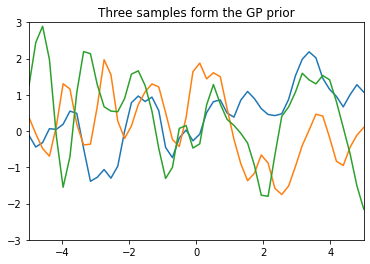

In [8]:
#Now let's plot the 3 sampled functions.
plt.plot(Xtest, f_prior)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP prior')
plt.show()

In [9]:
#Noiseless training data
Xtrain = np.array([-4, -3,-2,-1, 1]).reshape(5,1)
Xtrain

array([[-4],
       [-3],
       [-2],
       [-1],
       [ 1]])

In [10]:
ytrain=  np.sin(Xtrain)
ytrain

array([[ 0.7568025 ],
       [-0.14112001],
       [-0.90929743],
       [-0.84147098],
       [ 0.84147098]])

In [12]:
#Apply the kernel fuction to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005* np.eye(len(Xtrain)))
L

array([[1.00002500e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.73777856e-03, 1.00000230e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [2.06110210e-09, 6.73793148e-03, 1.00000230e+00, 0.00000000e+00,
        0.00000000e+00],
       [2.86244702e-20, 2.06114888e-09, 6.73793149e-03, 1.00000230e+00,
        0.00000000e+00],
       [5.16629148e-55, 1.80484723e-35, 2.86251200e-20, 2.06114888e-09,
        1.00002500e+00]])

In [13]:
#Comput the mean at our test points
K_s = kernel(Xtrain, Xtest, param)
Lk  = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))
mu

array([ 5.10540173e-03,  3.19083754e-02,  1.31491504e-01,  3.57274111e-01,
        6.39969745e-01,  7.54976985e-01,  5.82010091e-01,  2.75066805e-01,
        3.09667437e-02, -1.00823960e-01, -1.44679534e-01, -1.55669988e-01,
       -2.48929713e-01, -5.11201872e-01, -8.19888846e-01, -8.96610717e-01,
       -6.91126635e-01, -5.04395528e-01, -5.83624860e-01, -7.94211545e-01,
       -8.10572835e-01, -5.55629336e-01, -2.51731755e-01, -7.50618566e-02,
       -1.28833260e-02,  1.30052570e-02,  7.56102349e-02,  2.53550896e-01,
        5.59440765e-01,  8.13854884e-01,  7.80654580e-01,  4.93730752e-01,
        2.05892619e-01,  5.66122882e-02,  1.02636060e-02,  1.22689832e-03,
        9.67022326e-05,  5.02555192e-06,  1.72206825e-07,  3.89077654e-09,
        5.79617581e-11,  5.69332721e-13,  3.68731357e-15,  1.57461118e-17,
        4.43359403e-20,  8.23109946e-23,  1.00757900e-25,  8.13241811e-29,
        4.32792397e-32,  1.51865415e-35])

In [14]:
#Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv  = np.sqrt(s2)

stdv

array([0.9999773 , 0.99911291, 0.98482709, 0.88185022, 0.53512662,
       0.06483626, 0.62764722, 0.89639736, 0.85044798, 0.48312813,
       0.12866441, 0.66952958, 0.90545292, 0.82868417, 0.42924457,
       0.19182893, 0.70811599, 0.91146737, 0.80361233, 0.37290176,
       0.25396967, 0.74696167, 0.9535155 , 0.99593676, 0.99983989,
       0.9998399 , 0.99593694, 0.95351763, 0.7469736 , 0.2539957 ,
       0.37320408, 0.80975953, 0.96960189, 0.99773417, 0.99992561,
       0.99999894, 0.99999999, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [16]:
#Draw samples from the poterior at our test points
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1, 1) + np.dot(L, np.random.normal(size=(n,3)))
f_post

array([[ 0.03186428, -1.08436819, -1.18104303],
       [ 0.21327032, -0.1816052 , -1.33821287],
       [ 0.01805702,  0.92838786, -0.78053319],
       [-0.44189983,  1.38624635,  0.58738321],
       [-0.19330123,  1.18713195,  1.25916333],
       [ 0.8565533 ,  0.70532211,  0.68772319],
       [ 1.54365183,  0.32969879,  0.16830923],
       [ 1.09460547,  0.07817108,  0.42411983],
       [ 0.09600793, -0.2182034 ,  0.73272107],
       [-0.33932855, -0.36547405,  0.39787541],
       [-0.03515658, -0.10210387, -0.2776577 ],
       [ 0.46473326, -0.375779  , -1.01673895],
       [ 0.68824712, -1.07098807, -1.50937986],
       [ 0.34614051, -1.09731598, -1.59002699],
       [-0.50135434, -1.01058847, -1.43783948],
       [-0.98492539, -0.84421993, -0.59143778],
       [-0.93963258, -0.73474963,  0.24948081],
       [-0.90145429, -0.81068703,  0.09121095],
       [-1.01152076, -0.50405906, -0.89164347],
       [-1.0963992 , -0.60265781, -1.25683337],
       [-0.53992356, -0.92957038, -0.460

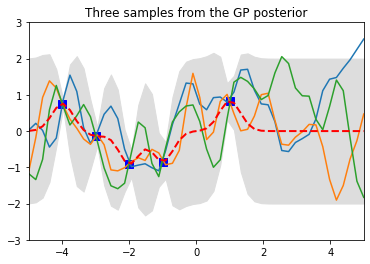

In [19]:
plt.plot(Xtrain, ytrain, 'bs', ms=8)
plt.plot(Xtest, f_post)
plt.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
plt.plot(Xtest, mu, 'r--', lw=2)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP posterior')
plt.show()